<a href="https://colab.research.google.com/github/dsvalencias/MachineLearning/blob/main/Assignment_2_Bayesian_Decision_Theory_and_Parametric_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2, Machine Learning 2021**

> García Arenas, Diego Alejandro - diagarciaar@unal.edu.co

> Higuaran Serrano, Luis Alejandro - lahiguarans@unal.edu.co

> Valencia Salazar, Dave Sebastian - dsvalencias@unal.edu.co




In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,roc_auc_score

## Problem 1(a)

Download the Pima Indians Diabetes dataset. Load the dataset as a numpy arrays. The outcome column corresponds to the class label, the other columns to input features.

In [ ]:
git_raw_url_dataset = 'https://raw.githubusercontent.com/dsvalencias/MachineLearning/main/Datasets/diabetes.csv'
diabetes_df = pd.read_csv(git_raw_url_dataset)
print("Diabetes shape:",diabetes_df.shape) #(768, 9)

Diabetes shape: (768, 9)


In [ ]:
git_raw_url_dataset = "https://raw.githubusercontent.com/dsvalencias/MachineLearning/main/Datasets/diabetes.csv"
diabetes = np.genfromtxt( git_raw_url_dataset ,delimiter=',')
diabetes = np.delete(diabetes, (0), axis=0)
print("Diabetes shape:",diabetes.shape)

Diabetes shape: (768, 9)


In [ ]:
print(diabetes_df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


## Problem 1(b)

Split the dataset in training and validation using the following scikit-learn command:

*`train_test_split(X, y, test_size=0.33, random_state=42)`*

where X and y are the input features and labels respectively

In [ ]:
X = diabetes_df[diabetes_df.columns[0:8]]
y = diabetes_df['Outcome']
data_train, data_validation, target_train, target_validation = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print(X.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [ ]:
print(y.name)

Outcome


In [ ]:
print("data_train shape:",data_train.shape)
print("target_train shape:",target_train.shape)
print("data_validation shape:",data_validation.shape)
print("target_validation:",target_validation.shape)

data_train shape: (514, 8)
target_train shape: (514,)
data_validation shape: (254, 8)
target_validation: (254,)


In [ ]:
data_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,0,0,24.0,1.022,34
223,7,142,60,33,190,28.8,0.687,61
393,4,116,72,12,87,22.1,0.463,37
766,1,126,60,0,0,30.1,0.349,47
570,3,78,70,0,0,32.5,0.270,39


In [ ]:
target_train.head()

464    0
223    0
393    0
766    1
570    0
Name: Outcome, dtype: int64

In [ ]:
data_validation.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50


In [ ]:
target_validation.head()

668    0
324    0
624    0
690    0
473    0
Name: Outcome, dtype: int64

In [ ]:
featurenames = ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',
                'Insulin'	,'BMI',	'DiabetesPedigreeFunction',	'Age']

X = diabetes[:,0:8]
y = diabetes[:,8]
trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.33, random_state=42)

print("TrainX shape:",trainx.shape)
print("TrainY shape:",trainy.shape)
print("TestX shape:",testx.shape)
print("TestY shape:",testy.shape)


TrainX shape: (514, 8)
TrainY shape: (514,)
TestX shape: (254, 8)
TestY shape: (254,)


## Problem 1(c)

For each one of the 8 input features build a univariate Gaussian classifier estimating the parameters using the training dataset and evaluating the classifier in the validation dataset. For each classifier write down the parameters. Report accuracy, precision and recall. Which classifier is the best? For this classifier draw the curves for the posterior distribution for each class and show where the decision boundary is.


In [ ]:
def mean_variance_prior(x, r, c):
  mean, variance, prior = 0, 0, 0
  if c == 1:
    r_total = np.sum(r)
  elif c == 0:
    r = np.subtract(1, r)
    r_total = np.sum(r)
  mean = np.divide(np.sum(np.multiply(x, r)), r_total)
  variance = np.divide(np.sum(np.multiply(np.power(np.subtract(x, mean), 2), r)), r_total)  
  prior = r_total / r.shape[0]
  return (mean, variance, prior)

In [ ]:
import math 
def discrimination(x, m, s, c):
  pi = math.pi
  a_aux = - (np.log(2*pi) / 2)
  b_aux = - (np.log(np.sqrt(s)))
  c_aux = - ((x - m) ** 2) / (2 * s)  
  d_aux = np.log(c)
  g = a_aux + b_aux + c_aux + d_aux
  return g

In [ ]:
def indicators(t, y):
  tp, tn, fp, fn, p, n = 0, 0, 0, 0, 0, 0
  for i in range(0, len(t)):
    if t[i] == 0 and y[i] == 0:
      n += 1
      tn += 1
    elif t[i] == 0 and y[i] == 1:
      p += 1
      fn += 1
    elif t[i] == 1 and y[i] == 0:
      n += 1
      fp += 1
    elif t[i] == 1 and y[i] == 1:
      p += 1
      tp += 1
  total = tn + fn + fp + tp 
  return (tp, tn, fp, fn, p, n, total)

In [ ]:
def univariate_Gaussian_classifier(trainx, testx, trainy, testy):
  result= []
  glucose_positive_score = []
  for col in range(trainx.shape[1]):
    prediction = []
    feature = trainx[:,col]
    target = trainy
    test_feature = testx[:,col]
    test_target = testy
    dist_0 = mean_variance_prior(feature, target, 0)
    dist_1 = mean_variance_prior(feature, target, 1)
    for sample in test_feature:
      g_0 = discrimination(sample, dist_0[0], dist_0[1], dist_0[2])
      g_1 = discrimination(sample, dist_1[0], dist_1[1], dist_1[2])
      if col == 1:
        glucose_positive_score.append(g_1)
      scores = [g_0,g_1]
      predicted = np.argmax(scores)
      prediction.append(predicted)
    metrics = indicators(prediction, test_target)
    #(tp, tn, fp, fn, p, n, total)
    accuracy = (metrics[0] + metrics[1]) / metrics[6]
    precision = metrics[0] / (metrics[0] + metrics[2])
    recall = metrics[0] / (metrics[0] + metrics[3])
    F1 = (2 * precision * recall) / (precision + recall)
    parameters = [dist_0[0], dist_0[1], dist_1[0], dist_1[1], metrics[0], metrics[1], metrics[2], metrics[3], accuracy, precision, recall, F1]
    result.append(parameters)
  return np.array(result) , glucose_positive_score

In [ ]:
result, glucose_positive_score = univariate_Gaussian_classifier(trainx, testx, trainy, testy)

In [ ]:
results = pd.DataFrame(result, columns=['mean_0', 'var_0', 'mean_1', 'var_1', 'TP', 'TN', 'FP', 'FN','accuracy', 'precision', 'recall', 'F1'], index=['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',
                'Insulin'	,'BMI',	'DiabetesPedigreeFunction',	'Age'])
results.sort_values(by=['F1'], ascending=False)

,mean_0,var_0,mean_1,var_1,TP,TN,FP,FN,accuracy,precision,recall,F1
Glucose,109.734940,634.923719,142.384615,1104.610313,38.0,145.0,23.0,48.0,0.720472,0.622951,0.441860,0.517007
Pregnancies,3.304217,8.982753,4.653846,12.709848,29.0,149.0,19.0,57.0,0.700787,0.604167,0.337209,0.432836
BMI,30.138554,52.222008,35.310440,52.382144,19.0,149.0,19.0,67.0,0.661417,0.500000,0.220930,0.306452
Insulin,67.213855,8933.716314,101.170330,20653.350109,15.0,154.0,14.0,71.0,0.665354,0.517241,0.174419,0.260870
DiabetesPedigreeFunction,0.434973,0.096429,0.542621,0.146275,13.0,162.0,6.0,73.0,0.688976,0.684211,0.151163,0.247619
Age,30.743976,128.323006,37.653846,122.973584,14.0,143.0,25.0,72.0,0.618110,0.358974,0.162791,0.224000
BloodPressure,68.382530,313.573550,72.906593,328.908858,2.0,166.0,2.0,84.0,0.661417,0.500000,0.023256,0.044444
SkinThickness,19.822289,212.603961,21.807692,286.946534,2.0,165.0,3.0,84.0,0.657480,0.400000,0.023256,0.043956


According to the indicators, the function with the best classification function is **Glucose** with MLE parameters

$$ \mu_0 = 109.734940, \; \sigma_0^{2} = 634.923719$$
$$ \mu_1 = 142.384615, \; \sigma_1^{2} = 1104.610313$$







**Measures**

Accuracy: $72.04\%$

Recall: $44.18\%$

Precision: $62.29\%$

**Confusion Matrix**

| | Predicted class| | |
|---|:-:|:-:|:-:|
|**True Class**   |Positive|Negative   |Total|
|Positive|  38 |  48 | 86 |
|Negative|  23 | 145  | 168 | 
|Total| 61  |  193 | 254 |

<function matplotlib.pyplot.show>

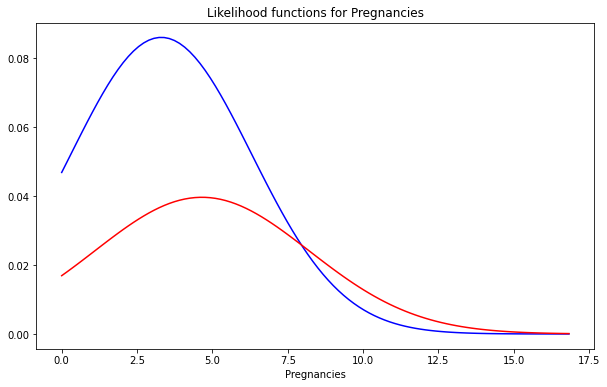

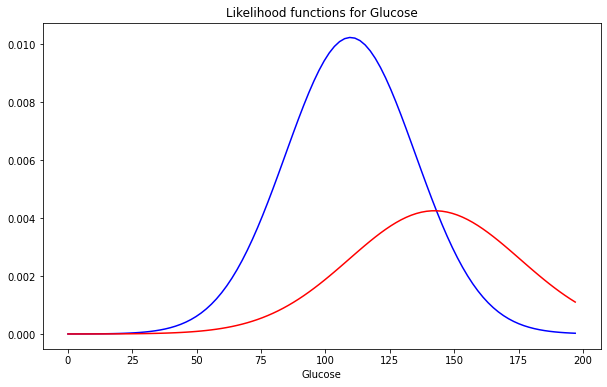

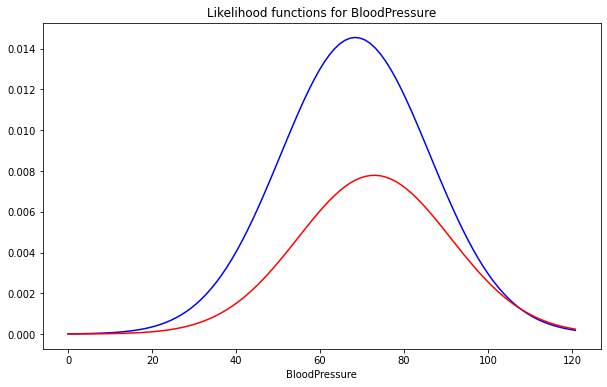

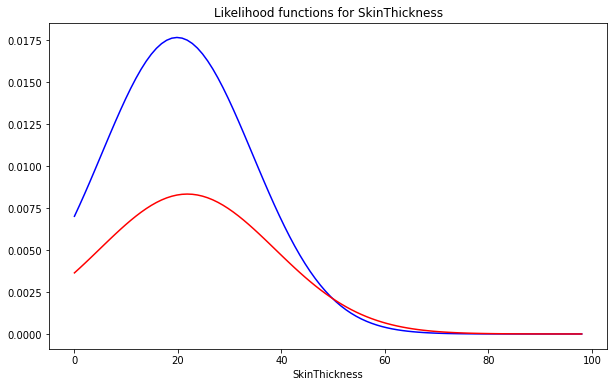

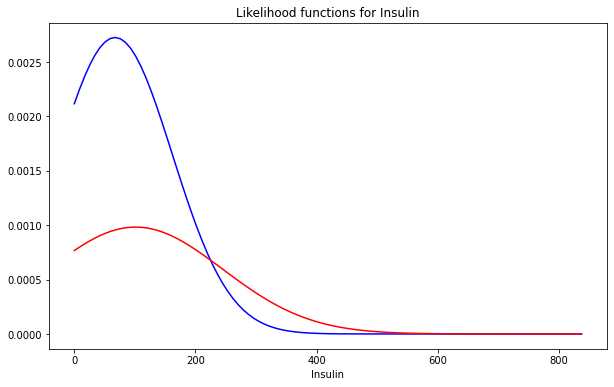

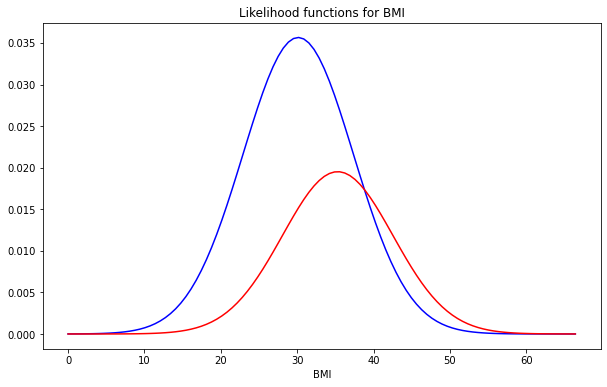

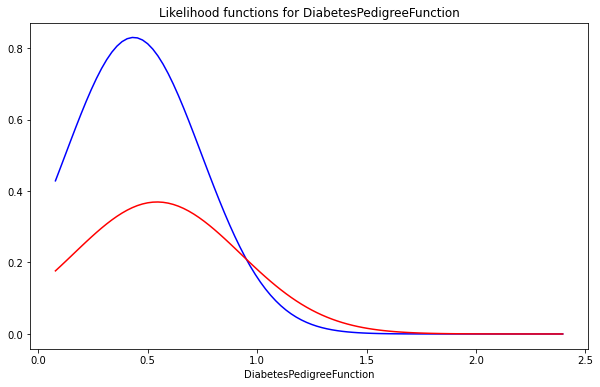

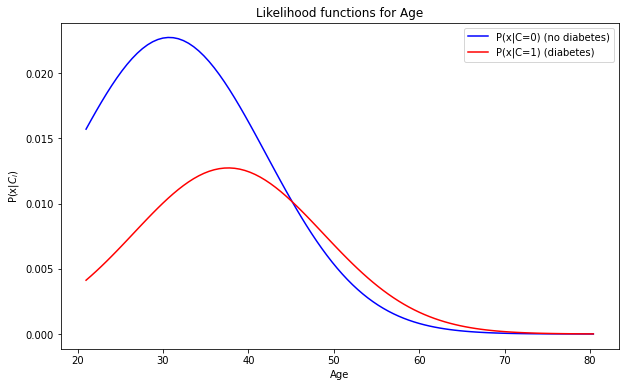

In [ ]:
from scipy.stats import norm, multivariate_normal
for column in range(trainx.shape[1]):
  dist_0 = mean_variance_prior(trainx[:,column], trainy, 0)
  dist_p0 = norm(dist_0[0], np.sqrt(dist_0[1]))
  dist_1 = mean_variance_prior(trainx[:,column], trainy, 1)
  dist_p1 = norm(dist_1[0], np.sqrt(dist_1[1]))
  max_value = diabetes[:,column].max()
  min_value = diabetes[:,column].min()
  f_x = np.arange(min_value, max_value, (max_value - min_value)/100).tolist()
  f_y0 = [dist_p0.pdf(i) * dist_0[2] for i in f_x]
  f_y1 = [dist_p1.pdf(i) * dist_1[2] for i in f_x]
  plt.figure(figsize = [10,6])
  pl.plot(f_x, f_y0, c='b',label='P(x|C=0) (no diabetes)')
  pl.plot(f_x, f_y1, c='r',label='P(x|C=1) (diabetes)')
  pl.title('Likelihood functions for ' + featurenames[column])
  pl.xlabel(featurenames[column])

pl.ylabel('P(x|$C_i$)')
pl.legend()
pl.show

To calculate the posterior likelihood we use the next equation:

$$ P(C_i|x)=\frac{p(x|C_i)\,P(C_i)}{\sum_{k=1}^{K}{p(x|C_i)\,P(C_k)}}$$

<function matplotlib.pyplot.show>

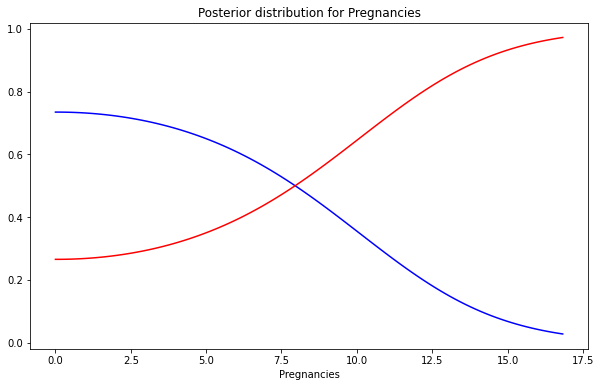

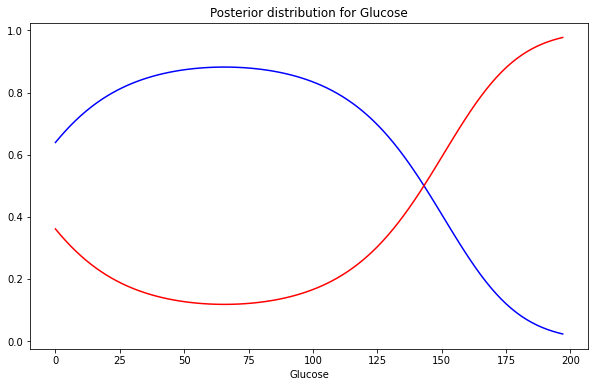

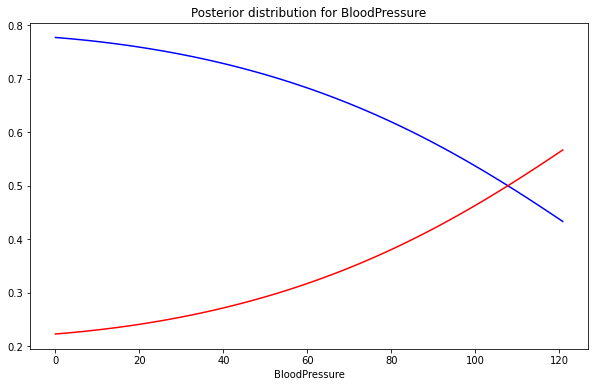

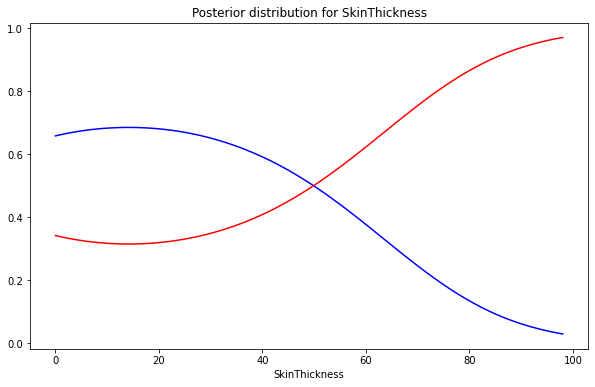

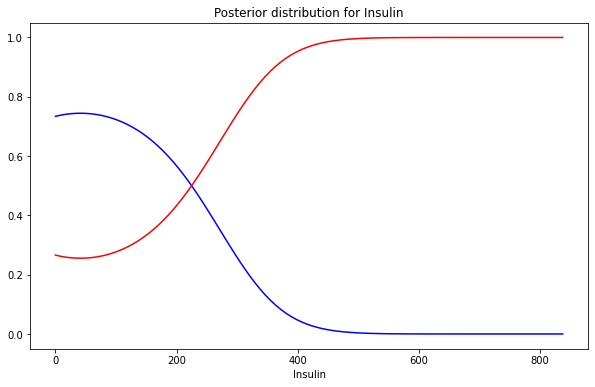

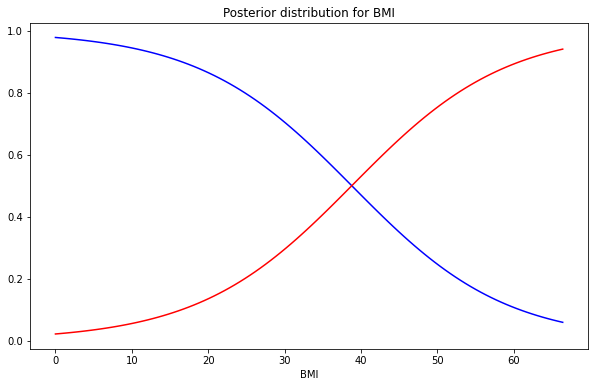

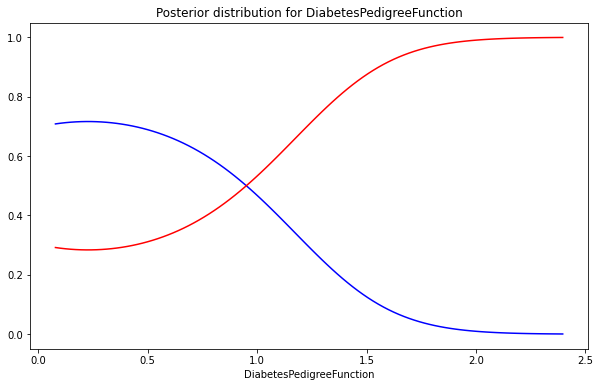

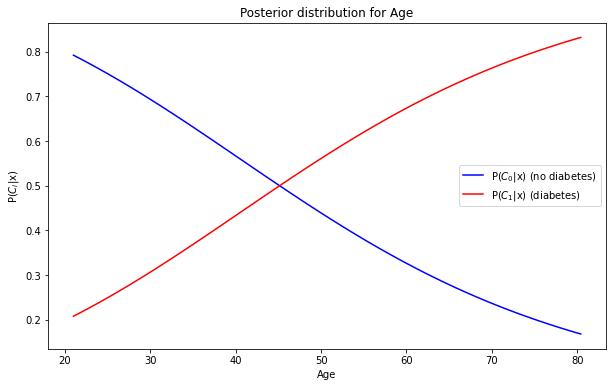

In [ ]:
from scipy.stats import norm, multivariate_normal
for column in range(trainx.shape[1]):
  dist_0 = mean_variance_prior(trainx[:,column], trainy, 0)
  dist_p0 = norm(dist_0[0], np.sqrt(dist_0[1]))
  dist_1 = mean_variance_prior(trainx[:,column], trainy, 1)
  dist_p1 = norm(dist_1[0], np.sqrt(dist_1[1]))
  max_value = diabetes[:,column].max()
  min_value = diabetes[:,column].min()
  f_x = np.arange(min_value, max_value, (max_value - min_value)/100).tolist()
  f_y0 = [dist_p0.pdf(i) * dist_0[2] for i in f_x]
  f_y1 = [dist_p1.pdf(i) * dist_1[2] for i in f_x]
  ty0=np.array(f_y0)/(np.array(f_y0) + np.array(f_y1))
  ty1=np.array(f_y1)/(np.array(f_y0) + np.array(f_y1))
  plt.figure(figsize = [10,6])
  pl.plot(f_x, ty0, c='b',label='P($C_0$|x) (no diabetes)')
  pl.plot(f_x, ty1, c='r',label='P($C_1$|x) (diabetes)')
  pl.title('Posterior distribution for ' + featurenames[column])
  pl.xlabel(featurenames[column])

pl.ylabel('P($C_i$|x)')
pl.legend()
pl.show

Consider the covariance matrix $\Sigma=I\sigma$, with $\sigma$ a scalar.
We create gaussians and estimate the maximum likelihood, 
The maximum likelihood is given by, 
$$\Phi_T=p_0^np_1^m\frac{1}{(\sqrt{2\pi}\sigma)^{(n+m)}}\prod\exp{\frac{-(\vec{x_{0i}}-\vec{\mu_0})^2}{2\sigma}}\prod\exp{\frac{-(\vec{x_{1i}}-\vec{\mu_1})^2}{2\sigma}}$$

Where, $\vec{x_{0i}}$ correspond to the points of class 0, $\vec{\mu_0}$ correspond to the mean parameter of class 0, $p_0$ the prior of class 0, and $n$ are the number of elements of class 0, $m$ of class 1, and the same for class 1.

By estimating the $\log(\Phi_T)$, the partial derivatives of the log likelihood and equating them to zero, one finds that,

$$\vec{\mu_0}=\frac{\sum\vec{x_{0i}}}{n}$$
$$\vec{\mu_1}=\frac{\sum\vec{x_{1i}}}{m}$$
$$\sigma=\frac{\sum(\vec{x_{0i}}-\vec{\mu_0})^2+\sum(\vec{x_{1i}}-\vec{\mu_1})^2}{m+n}$$

The $\sigma$ can be written in terms of $p_i$ and $\sigma_{ij}$, where $\sigma_{ij}$ is the variance of the feature j in class i,  

Hence, 

$$\sigma= p_0(\sigma_{00}+\sigma_{01})+p_1(\sigma_{10}+\sigma_{11})$$

Then $\sigma$ is some sort of weighted average (center of mass) of the variances of the classes and features.

##Problem 2(a)

In [ ]:
# Se halla la media y la varianza de dos características, asumiendo covarianza diagonal. 
def fit_diag_gauss_emv(x, caract1, caract2):#EMV: estimador de maxima verosimilitud
    caracteristicas = [caract1, caract2]
    covar = np.array([[np.var(x[:,caract1]), 0],[0, np.var(x[:,caract2])]])
    mu = np.mean(x[:,caracteristicas], axis=0)
    return mu, covar

# Se toma valores 0,1
def fit_mod_gen_emv(x, y, caract1, caract2):
    caracteristicas = [caract1, caract2]
    k = 2 # numero de clases
    d = len(caracteristicas) # numero de caracteristicas
    mu = np.zeros((k,d)) # promedio
    covar = np.zeros((k,d,d)) # matriz de covarianza 
    pi = np.zeros(k) # lista de pesos
    for label in range(k):
        indices = (y==label)
        mu[label,:], covar[label,:,:] = fit_diag_gauss_emv(x[indices,:], caract1, caract2)
        pi[label] = float(sum(indices))/float(len(y))
    return mu, covar, pi

def mod_train_emv(f1, f2):
    if f1 == f2: #f1 != f2
        #
        return  
    caracteristicas= [f1,f2]
    mu, covar, pi = fit_mod_gen_emv(trainx, trainy, f1, f2)
    
    k = 2 # 1,2,...,k
    nt = len(trainy) # numero de puntos de entrenamiento
    # Hallando valores de sigma
    sigma = 0
    for label in range(k):
      sigma += np.sum(covar[label,:,:])*pi[label]
    
    score = np.zeros((nt,k))
    for i in range(0,nt):
        for label in range(k):
            score[i,label] = np.log(pi[label]) + \
            multivariate_normal.logpdf(trainx[i,caracteristicas], mean=mu[label,:], cov=sigma)
    predictions = np.argmax(score, axis=1)
    # Puntuar
    errors = np.sum(predictions != trainy)

    accuracy = 1-(errors/nt)
    return mu, sigma, pi, accuracy    

##Problem 2(b)

In [ ]:
# Una función que crea la tabla de sigma y valores de precisión

def sigma_valor():
  
  acu_table = np.zeros((8,8))
  sigmaT = np.zeros((8,8))#tabla sigma
  for i in range(8):
    for j in range(i+1,8):
      mu, sigma_ij, pi, acu_ij = mod_train_emv(i, j)
      sigmaT[i,j] = sigma_ij 
      acu_table[i,j] = acu_ij

  # sigma
  tabla1 = pd.DataFrame(sigmaT)
  # Cambio de nombre de columnas
  tabla1.columns = featurenames
  # Cambio de las filas 
  tabla1.index = featurenames
  tabla1.replace(0, np.nan, inplace=True)#cambiar valores 0 por nan
  tabla1.columns.name = 'Sigma: estimador de maxima verosimilitud'


  # accuracy table
  tabla2 = pd.DataFrame(acu_table)
  # Cambio de nombre columnas
  tabla2.columns = featurenames
  # Cambio de las filas 
  tabla2.index = featurenames
  tabla2.replace(0, np.nan, inplace=True)
  tabla2.columns.name = 'Modelo de exactitud: estimador de maxima verosimilitud'

  return tabla1, tabla2, sigmaT

In [ ]:
sigmaTemv, accuTemv, sigmaT_np = sigma_valor()

###Sigma MLE

In [ ]:
sigmaTemv

Sigma: estimador de maxima verosimilitud,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,NaN,811.535444,329.306026,249.230060,13093.772378,62.581173,10.416543,136.731316
Glucose,NaN,NaN,1120.236542,1040.160576,13884.702894,853.511689,801.347059,927.661832
BloodPressure,NaN,NaN,NaN,557.931158,13402.473476,371.282271,319.117641,445.432414
SkinThickness,NaN,NaN,NaN,NaN,13322.397510,291.206305,239.041675,365.356449
Insulin,NaN,NaN,NaN,NaN,NaN,13135.748624,13083.583993,13209.898767
BMI,NaN,NaN,NaN,NaN,NaN,NaN,52.392788,178.707562
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.542932
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###Accuracy MLE

In [ ]:
accuTemv

Modelo de exactitud: estimador de maxima verosimilitud,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,NaN,0.754864,0.643969,0.645914,0.655642,0.677043,0.647860,0.663424
Glucose,NaN,NaN,0.752918,0.756809,0.661479,0.758755,0.754864,0.752918
BloodPressure,NaN,NaN,NaN,0.645914,0.655642,0.651751,0.643969,0.642023
SkinThickness,NaN,NaN,NaN,NaN,0.655642,0.649805,0.645914,0.643969
Insulin,NaN,NaN,NaN,NaN,NaN,0.655642,0.655642,0.655642
BMI,NaN,NaN,NaN,NaN,NaN,NaN,0.659533,0.653696
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.663424
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hence the best pair of features for training are (Glucose, BMI), with, 

$$\sigma_{\text{MLE}}=853.511689$$
And accuracy in the training data set of 75.87%

### Model 1: MLE Test

In [ ]:

def mod_testemv(f1, f2):
    if f1 == f2: # f1 != f2
        return  
    caracteristicas= [f1,f2]
    mu, covar_0, pi, accuracy  = mod_train_emv(f1, f2)

    errors_0 = len(testy) + 1
    k = 2 # 1,2,...,k
    nt = len(testy) # Puntos de entrenamiento
    score = np.zeros((nt,k))
    for i in range(0,nt):
        for label in range(k):
            score[i,label] = np.log(pi[label]) + \
            multivariate_normal.logpdf(testx[i,caracteristicas], mean=mu[label,:], cov=covar_0, allow_singular=True)
    predictions = np.argmax(score[:,0:2], axis=1)
    # Puntuamos
    errors = np.sum(predictions != testy)
    if errors < errors_0:
      errors_0 = errors

    accuracy = 1-(errors_0/nt)
    return accuracy, score

In [ ]:
accuemv, _ = mod_testemv(1, 5)
accuemv

0.7283464566929134

Hence the model bivariate gaussian with features (Glucouse, BMI) and $\sigma = 853.5116 $

Gives an accuracy on the test data set of 72.83%

### Conclusion 

For the maximum likelihood model the results are:

*   best pair of features: (Glucouse, BMI)
*   $\sigma_{\text{MLE}}=853.511689$
*   Accuracy on (train, test) = (75.87%,72.83%) 
*   $\mu = \begin{bmatrix} \mu_{\text{glucose_0}} & \mu_{\text{bmi_0}} \\ \mu_{\text{glucose_1}} & \mu_{\text{bmi_1}} \end{bmatrix} = \begin{bmatrix} 109.73493976 &  30.13855422 \\ 142.38461538 &  35.31043956 \end{bmatrix} $
*   $\vec{p}= (0.6459144, 0.3540856)$

We conclude that our final result for sigma is, 

$$\sigma=853.511689$$



Draw ROC curves for the best performing univariate model (from question 1) and bivariate model. Which model is better? Explain the results.

## Problem 2(c)

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

$$ TPR=\frac{TP}{TP + FN}$$

False Positive Rate (FPR) is defined as follows:

$$ FPR=\frac{FP}{FP + TN}$$

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

In [ ]:
accuracy_roc, score_roc = mod_testemv(1, 5)

In [ ]:
def positive_score(score_p):
  nt = len(testy)
  score_pdf = np.exp(score_p)
  score_pdf = score_pdf/score_pdf.sum(axis=1).reshape((nt,1))
  return score_pdf[:,1]

positive_score_t = positive_score(score_roc)

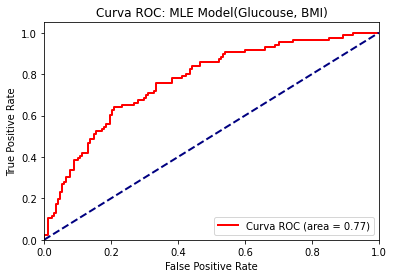

In [ ]:
def roc_estimation(testy_p, positive_score_p, title_roc=''):
  # Calculo de curva ROC y area ROC de cada clase
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  fpr[0], tpr[0], _ = roc_curve(testy_p, positive_score_p)
  roc_auc[0] = auc(fpr[0], tpr[0])

  # Calculo de promedio de la curva ROC y area ROC
  fpr["micro"], tpr["micro"], _ = roc_curve(testy.ravel(), positive_score_p.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  plt.figure()
  lw = 2
  plt.plot(fpr[0], tpr[0], color='red',
          lw=lw, label='Curva ROC (area = %0.2f)' % roc_auc[0])
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(title_roc)
  plt.legend(loc="lower right")
  plt.show()

roc_estimation(testy, positive_score_t, title_roc="Curva ROC: MLE Model(Glucouse, BMI)")

In [ ]:
def univariate_gaussian_classifier(means, vars, apriori, data, target):
  c_0 = np.array(norm.pdf(data, means[0], vars[0])) * apriori[0]
  c_1 = np.array(norm.pdf(data, means[1], vars[1])) * apriori[1]
  df = pd.concat([data, target], axis=1, join='inner')
  df['c_0'] = c_0
  df['c_1'] = c_1
  predicted = []
  scores = []
  for i in range(len(c_0)):
    s = [c_0[i], c_1[i]]
    scores.append(s)
    predicted.append(np.argmax(s))
  df['predicted'] = predicted
  confussion = {
      'TP': 0,
      'FP': 0,
      'TN': 0,
      'FN': 0
  }
  for (index, row) in df.iterrows():
    outcome = row['Outcome']
    c = row['predicted']
    if outcome == 1:
      if c == 1:
        confussion['TP'] += 1
      else:
        confussion['FN'] += 1
    elif outcome == 0:
      if c == 1:
        confussion['FP'] += 1
      else:
        confussion['TN'] += 1
  accuracy = (confussion['TP'] + confussion['TN'])/ len(target)
  return accuracy, confussion, np.array(scores)

In [ ]:
means_univariate = [results.loc['Glucose','mean_0'], results.loc['Glucose','mean_1']]
vars_univariate = [np.sqrt(results.loc['Glucose','var_0']), np.sqrt(results.loc['Glucose','var_1'])]
apriori_univariate = np.array([len(target_train[target_train == c])/len(target_train) for c in target_train.unique()])
accuracy_uv, confusion_uv, scores_uv = univariate_gaussian_classifier(means_univariate, vars_univariate, apriori_univariate, data_validation['Glucose'], target_validation)

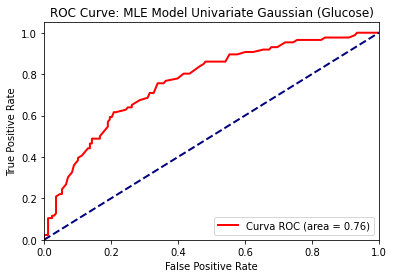

In [ ]:
scores_uv = scores_uv/scores_uv.sum(axis=1).reshape(len(target_validation),1)

roc_estimation(testy, scores_uv[:,1], title_roc='ROC Curve: MLE Model Univariate Gaussian (Glucose)')

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. The AUC for the Univariate classifier (Glucose) is equal to 0.76, while the AUC for the Bivariate classifier (Glucose - BMI) is equal to 0.77.

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0. For Univariate classifier (Glucose) predictions are 24% wrong and Bivariate classifier (Glucose - BMI) predictions are 23% wrong. So it's better Bivariate classifier (Glucose - BMI)


## Problem 3(a)

In order to determine all decision regions, we must take the minimum and maximum values of the training data so we can generate the axes and coordinate grid by means of meshgrid.

Then, we should carry out the classification for each of coordinates and assign them in Z, where all values to corresponding to class 0 map to -1 and class 1 map to 1.

Later on, we create the graph of regions of decision. The left region is for values classified in class 0 and the right region is for values classified in class 1. And the boundary is represented by the yellow line.

In [ ]:
def evaluate_classifier(mu_p, covar_p, pi_p, x_p, model_p = 'model MLE'):
    k = 2 # number of classes
    score = np.zeros(k)
    if (model_p == 'model MLE'):
      for label in range(k):
        score[label] = np.log(pi_p[label]) + \
                multivariate_normal.logpdf(x_p, mean=mu_p[label,:], cov=covar_p, allow_singular=True)
        prediction = np.argmax(score)
    elif (model_p == 'model risk'):
      score[0] = np.log(2*pi_p[1]) + \
              multivariate_normal.logpdf(x_p, mean=mu_p[1,:], cov=covar_p, allow_singular=True)
      score[1] = np.log(pi_p[0]) + \
              multivariate_normal.logpdf(x_p, mean=mu_p[0,:], cov=covar_p, allow_singular=True)
      prediction = np.argmin(score)
    if prediction == 0:
      return -1
    if prediction == 1:
      return 1

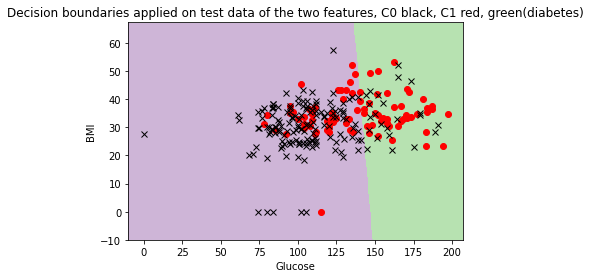

In [ ]:
def plot_region(f1, f2, sigma):
    
    features = [f1, f2]
    # select the test data set with the two features
    x = testx[:,features]
    y = testy
    # find the mu and pi with the training data set
    mu, covar, pi = fit_mod_gen_emv(trainx, trainy, f1, f2)
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 10
    x1max = max(x[:,0]) + 10
    x2min = min(x[:,1]) - 10
    x2max = max(x[:,1]) + 10
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points
    plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
    plt.plot(x[(y==0),0], x[(y==0),1], 'kx')
    # Construct a grid of points at which to evaluate the classifier
    grid_spacing = 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = np.array([evaluate_classifier(mu, sigma, pi, x) for x in grid])
    # Show the classifier's boundary using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-3, vmax=3)
    pl.xlabel(featurenames[f1])
    pl.ylabel(featurenames[f2])
    pl.title('Decision boundaries applied on test data of the two features, C0 black, C1 red, green(diabetes)')
    plt.show()
plot_region(1, 5, 853.511689)

## Problem 3(b)

### Deduction of the line 

The equation of the line is given by, 

$$(\vec{\mu_1}-\vec{\mu_0})\cdot\vec{x}= \sigma^2\log(p_0/p_1)+\frac{(\vec{\mu_1}-\vec{\mu_0})\cdot(\vec{\mu_1}+\vec{\mu_0})}{2}$$

Where $\vec{\mu_i}$ and $p_i$ are the mean vector and prior probability of class $i$. And $\vec{x}= (x_1, x_2)$

Proof: 

The probability of class $i$ for any point in the space $\vec{x}$ is given by
$$\Phi_i=\frac{p_i}{\sqrt{2\pi}\sigma}e^{-(\frac{(\vec{x}-\vec{\mu_i})^2}{2\sigma^2})}$$

In the boundary $\Phi_0=\Phi_1$, which leads, to, 

$$2\sigma^2\log(p_0/p_1)=(\vec{x}-\vec{\mu_0})^2-(\vec{x}-\vec{\mu_1})^2$$

But, 

$$(\vec{x}-\vec{\mu_0})^2-(\vec{x}-\vec{\mu_1})^2= (\vec{\mu_1}-\vec{\mu_0})\cdot(2\vec{x}-(\vec{\mu_1}+\vec{\mu_0}))$$

Hence, 

$$2\sigma^2\log(p_0/p_1)= (\vec{\mu_1}-\vec{\mu_0})\cdot(2\vec{x}-(\vec{\mu_1}+\vec{\mu_0}))$$

From the last equation the equation of the line follows.

In our data the equation is, 

$$32.64x+5.17y=4798$$

In [ ]:
# Create the function of the line between the boundaries

def boundary_line(mu_p, sigma_p, pi_p): 
  a = mu_p[1,0]-mu_p[0,0]
  b = mu_p[1,1]-mu_p[0,1]
  c = sigma_p*np.log(pi_p[0]/pi_p[1])+0.5*np.dot(mu_p[1,:]-mu_p[0,:],mu_p[1,:]+mu_p[0,:])

  return a, b, c

In [ ]:
def plot_test2(f1, f2, sigma, model_p = 'model MLE'):
    
    features = [f1, f2]
    # select the test data set with the two features
    x = testx[:,features]
    y = testy
    # find the mu and pi with the training data set
    mu, covar, pi = fit_mod_gen_emv(trainx, trainy, f1, f2)
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 10
    x1max = max(x[:,0]) + 10
    x2min = min(x[:,1]) - 10
    x2max = max(x[:,1]) + 10
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points
    plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
    plt.plot(x[(y==0),0], x[(y==0),1], 'kx')
    # Construct a grid of points at which to evaluate the classifier
    grid_spacing = 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = np.array([evaluate_classifier(mu, sigma, pi, x, model_p) for x in grid])
    # Show the classifier's boundary using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-3, vmax=3)
    pl.xlabel(featurenames[f1])
    pl.ylabel(featurenames[f2])
    if (model_p == 'model MLE'):
      pl.title('Decision boundaries applied on test data with the decision line(blue) Model MLE')
    elif (model_p == 'model risk'):
      pl.title('Decision boundaries for the (1,2) risk model: diabetes in green, blue(line of assuming same risk (1,1) for each class)')
    #plt.show()

    return mu, pi, pl, x2min, x2max

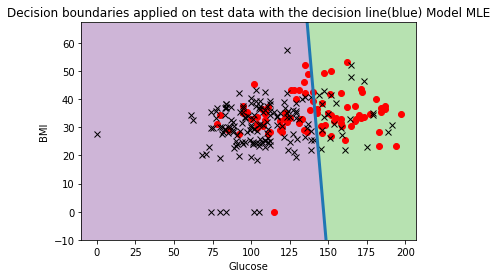

In [ ]:
def plot_line(f1, f2, sigma_p, model_p = 'model MLE'):
  
  mu, pi, bound_plot, x2min, x2max = plot_test2(f1, f2, sigma_p,  model_p)
  a, b, c = boundary_line(mu, sigma_p, pi)

  y = np.linspace(x2min, x2max, num = 50)
  x = (-b/a)*y+(c/a)
  bound_plot.plot(x,y,linewidth=3.0)
  bound_plot.show()
plot_line(1, 5, 853.511689)

In [ ]:
mu_line, _ , pi_line = fit_mod_gen_emv(trainx, trainy, 1, 5)
boundary_line(mu_line, 853.511689, pi_line )

(32.64967562557925, 5.171885343572086, 4798.128208125643)

## Problem 4(a)

The expected risk for taking action $\alpha_i$ is
$$ R(\alpha_i | x) = \sum_{k=1}^{K} {\lambda_{ik} P(C_k |x)}$$
and we choose the action with minimum risk ($\alpha_i$ if $ R(\alpha_i|x) = min_{k}{R(\alpha_k|x)}$)

define risk assignment as the exercise propose:

$$\lambda_{ik} = \begin{cases}{0 \; \text{if} \, i == k\\ 2 \; \text{if} \, i = 0\, \text{and}\, k=1\\ 1  \; \text{if} \, i = 1\, \text{and}\, k=0}\end{cases} $$

Where $\lambda_{ik}$ is the loss incurring for taking action $\alpha_i$ when the input actually belongs to $C_k$. When we evaluate in the ecuation of the risk with the lambda values, obtained the following values for actions:

$$R(\alpha_0|x)\,=\,2\,P(C_1|x)$$

$$R(\alpha_1|x)\,=\,P(C_0|x)$$

So, we have to choose the action that have the minimum risk or in mathematical terms we classified in class 0 when:

$$P(C_0|x) > 2P(C_1|x))$$

And class 1 otherwise. Hence we can write a density function similar as in problem 3 but doubling the probability of the points with diabetes.


In [ ]:
estimators = {}
features = diabetes_df[diabetes_df.columns[0:8]]
for f in features:
  df_tmp = pd.concat([data_train[f], target_train], axis=1, join='inner')
  classes = df_tmp['Outcome'].unique()
  estimators[f] = {}
  for c in classes:        
    df_tmp[f][df_tmp['Outcome'] == c]
    estimators[f][f'mean_{c}'] = df_tmp[f][df_tmp['Outcome'] == c].mean()
    estimators[f][f'var_{c}'] = df_tmp[f][df_tmp['Outcome'] == c].var()

df_estimators = pd.DataFrame.from_dict(estimators, orient='index')
df_estimators

,mean_0,var_0,mean_1,var_1
Pregnancies,3.304217,9.009892,4.653846,12.780068
Glucose,109.734940,636.841918,142.384615,1110.713132
BloodPressure,68.382530,314.520902,72.906593,330.726034
SkinThickness,19.822289,213.246269,21.807692,288.531874
Insulin,67.213855,8960.706394,101.170330,20767.457015
BMI,30.138554,52.379778,35.310440,52.671548
DiabetesPedigreeFunction,0.434973,0.096720,0.542621,0.147084
Age,30.743976,128.710689,37.653846,123.652996


In [ ]:
glucose = df_estimators.loc['Glucose', :]
bmi = df_estimators.loc['BMI', :]
mean_0 = np.array([glucose['mean_0'], bmi['mean_0']])
mean_1 = np.array([glucose['mean_1'], bmi['mean_1']])
p = np.array([len(target_train[target_train == c])/len(target_train) for c in target_train.unique()])
p

array([0.6459144, 0.3540856])

In [ ]:
sigma_4 = 853.511689
sigma_4

853.511689

In [ ]:
c_0 = np.array(multivariate_normal.pdf(data_validation[['Glucose','BMI']], mean=mean_0, cov=np.sum(sigma_4),allow_singular=True)*p[0])
c_1 = np.array(multivariate_normal.pdf(data_validation[['Glucose','BMI']], mean=mean_1, cov=np.sum(sigma_4),allow_singular=True)*p[1])

t = pd.concat([data_validation[['Glucose', 'BMI']], target_validation], axis=1, join='inner')
t['c_0'] = c_0
t['c_1'] = c_1

In [ ]:
predicted = []
scores_risk = []
for i in range(len(c_0)):
  scores = [2 * c_1[i], c_0[i]]
  #scores = [c_1[i], c_0[i]]
  scores_risk.append(scores)
  predicted.append(np.argmin(scores))
t['predicted'] = predicted
t.head()

,Glucose,BMI,Outcome,c_0,c_1,predicted
668,98,34.0,0,0.000110,0.000021,0
324,112,35.7,0,0.000118,0.000038,0
624,108,30.8,0,0.000120,0.000033,0
690,107,24.6,0,0.000118,0.000030,0
473,136,29.9,0,0.000080,0.000063,1


In [ ]:
#Creating confusion matrix
confussion = {
    'TP': 0,
    'FP': 0,
    'TN': 0,
    'FN': 0
}

for (index, row) in t.iterrows():
  outcome = row['Outcome']
  c = row['predicted']
  if outcome == 1:
    if c == 1:
      confussion['TP'] += 1
    else:
      confussion['FN'] += 1
  elif outcome == 0:
    if c == 1:
      confussion['FP'] += 1
    else:
      confussion['TN'] += 1

accuracy_risk = (confussion['TP'] + confussion['TN'])/ len(target_validation)
confussion

{'FN': 28, 'FP': 48, 'TN': 120, 'TP': 58}

**Confusion Matrix for Test Validation**

| | Predicted class| | |
|---|:-:|:-:|:-:|
|**True Class**   |Positive|Negative   |Total|
|Positive|  58 |  28 | 86 |
|Negative|  48 | 120  | 168 | 
|Total| 104  |  150 | 254 |


Accuracy on validation set: $70.08\%$

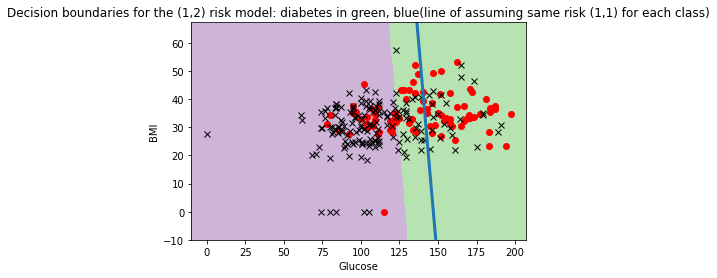

In [ ]:
plot_line(1, 5, sigma_4, 'model risk')

###Discuss

In contrast to part 2, this model is less accurate and precise due to risk actions since we can choose a class when the probability is higher however cost associated with false negative outweights false positive. On the other hand, recall improved thanks to shifting the decision boundary.

## Problem 4(b)

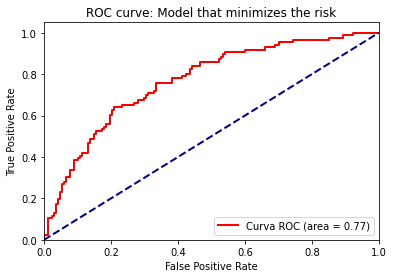

In [ ]:
nt_risk = len(target_validation)
score_risk = np.array(scores_risk)

score_p_risk = score_risk/score_risk.sum(axis=1).reshape((nt_risk,1))

roc_estimation(testy, score_p_risk[:,0], title_roc='ROC curve: Model that minimizes the risk')

###Discuss

According to the plot show above, ROC curve for minimum risk optimization has a slightly edge over a regular bivariate classifier to have a high risk classifition of a pacient who doesn't suffer diabetes as a diabetic, therefore, we can infer the rate of false positive will be less than the original bivariate classifier.

## Problema 5(a)

Using the best combination of parameters found in question 2 build a bivariate classifier,
but this time the covariance matrix could be an arbitrary matrix (not diagonal) and
different for each class.

In [ ]:
# Find the mean and the covariance of two features. 
def fit_gaussian(x, feature1, feature2):
    features = [feature1, feature2]
    mu = np.mean(x[:,features], axis=0)
    covar = np.cov(x[:,features], rowvar=0, bias=1)
    return mu, covar

In [ ]:
# Assumes y takes on values 0,1
def fit_gaussian_model(x, y, feature1, feature2):
    features = [feature1, feature2]
    k = 2 # number of classes
    d = len(features) # number of features
    mu = np.zeros((k,d)) # list of means
    covar = np.zeros((k,d,d)) # list of covariance matrices
    pi = np.zeros(k) # list of class weights
    for label in range(k):
        indices = (y==label)
        mu[label,:], covar[label,:,:] = fit_gaussian(x[indices,:], feature1, feature2)
        pi[label] = float(sum(indices))/float(len(y))
    return mu, covar, pi

In [ ]:
mu_trained, covar_trained, pi_trained = fit_gaussian_model(trainx, trainy, 1, 5)

print('The optimized mean is:')
print(mu_trained)
print('The optimized covariance matrix for class 0 is:')
print(covar_trained[0,:,:])
print('The optimized covariance matrix for class 1 is:')
print(covar_trained[1,:,:])

The optimized mean is:
[[109.73493976  30.13855422]
 [142.38461538  35.31043956]]
The optimized covariance matrix for class 0 is:
[[634.92371897  12.95509871]
 [ 12.95509871  52.22200755]]
The optimized covariance matrix for class 1 is:
[[1104.61031276    5.87895182]
 [   5.87895182   52.38214376]]


In [ ]:
def test_gaussian_model(f1, f2):
    if f1 == f2: # need f1 != f2
        print("Please choose different features for f1 and f2.")
        return  
    features= [f1,f2]
    mu, covar_0, pi = fit_gaussian_model(trainx, trainy, f1, f2)

    errors_0 = len(testy) + 1
    k = 2 # Labels 1,2,...,k
    nt = len(testy) # Number of train points
    score = np.zeros((nt,k))
    for i in range(0,nt):
        for label in range(k):
            score[i,label] = np.log(pi[label]) + \
            multivariate_normal.logpdf(testx[i,features], mean=mu[label,:], cov=covar_0[label,:,:], allow_singular=True)
    predictions = np.argmax(score[:,0:2], axis=1)
    # Finally, tally up score
    errors = np.sum(predictions != testy)
    if errors < errors_0:
      errors_0 = errors

    accuracy = 1-(errors_0/nt)
    return accuracy, errors

In [ ]:
test_gaussian_model(1, 5)

(0.7519685039370079, 63)

Hence the results for the bivariate normal distribution (arbitrary covariance matrices and different for each class) are:



*   Accuracy on test data set = 75.19% 
*   $\mu = \begin{bmatrix} \mu_{\text{glucose_0}} & \mu_{\text{bmi_0}} \\ \mu_{\text{glucose_1}} & \mu_{\text{bmi_1}} \end{bmatrix} = \begin{bmatrix} 109.73493976 &  30.13855422 \\ 142.38461538 &  35.31043956 \end{bmatrix} $
*   $\sigma_0 = \begin{bmatrix} 634.92371897 &  12.95509871 \\ 12.95509871 &  52.22200755 \end{bmatrix} $
*   $\sigma_1 = \begin{bmatrix} 1104.61031276  &  5.87895182 \\ 5.87895182 &  52.38214376 \end{bmatrix} $
*   $\vec{p}= (0.6459144, 0.3540856)$

## Problema 5(b)

Draw the regions corresponding to each class. Compare with the regions obtained in
question 3. Discuss.

In [ ]:
def evaluate_classifier_gaussian(mu_p, covar_p, pi_p, x_p):
    k = 2 # number of classes
    score = np.zeros(k)
    for label in range(k):
      score[label] = np.log(pi_p[label]) + \
              multivariate_normal.logpdf(x_p, mean=mu_p[label,:], cov=covar_p[label,:,:], allow_singular=True)
      prediction = np.argmax(score[0:2])
    if prediction == 0:
      return -1
    if prediction == 1:
      return 1

In [ ]:
def plot_test_gaussian(f1, f2):
    
    features = [f1, f2]
    # select the test data set with the two features
    x = testx[:,features]
    y = testy
    # find the mu and pi with the training data set
    mu, covar, pi = fit_gaussian_model(trainx, trainy, f1, f2)
    # mu, covar, pi = fit_generative_model(trainx, trainy, f1, f2)
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 10
    x1max = max(x[:,0]) + 10
    x2min = min(x[:,1]) - 10
    x2max = max(x[:,1]) + 10
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points
    plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
    plt.plot(x[(y==0),0], x[(y==0),1], 'kx')
    # Construct a grid of points at which to evaluate the classifier
    grid_spacing = 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = np.array([evaluate_classifier_gaussian(mu, covar, pi, x) for x in grid])
    # Show the classifier's boundary using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-3, vmax=3)
    pl.xlabel(featurenames[f1])
    pl.ylabel(featurenames[f2])
    pl.title('Gaussian boundaries applied on test data of the two features, C0 black, C1 red, green(diabetes)')
    plt.show()

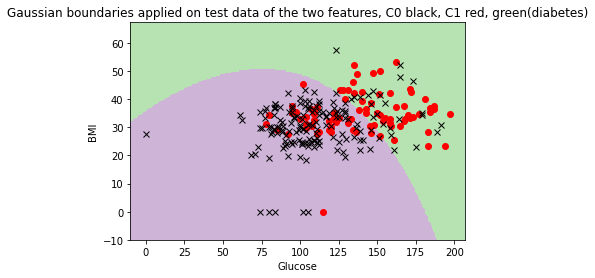

In [ ]:
plot_test_gaussian(1, 5)

Discuss: 

The Model of problem 5 has 75.2% of accuracy which is greater than the model of problem 2 (72.83%) on test data, that happens because model of problem 5 is more flexible. Moreover, the decision boundary of the model of problem 5 is not a line as in problem 3, that is because the covariance matrices of the two classes in problem 5 are different.

## Problem 5(c)

Add the possibility of rejection to your model. Draw the three regions corresponding to
both classes and rejection. Discuss.

We define an aditional action of reject $\alpha_{k+1}$ with $\alpha_i, i=1,...,K$ being the usual actions of deciding on classes $C_i, i=1,....,K$

A possible loss funtcion is 

$$\lambda_{ik} = \begin{cases}{0 \; \text{if} \, i = k\\ \lambda \; \text{if} \, i = K+1\, \\ 1  \; \text{otherwise} }\end{cases} $$

Where $0<\lambda < 1 $ is the loss incurred for choosing the (K+1)st  action reject. Then the risk of reject is 
$$R(\alpha_{K+1}|x)=\sum_{k=1}^{K}\lambda P(C_k|x)=\lambda$$

And the risk of choosing class $C_i$ is

$$R(\alpha_{i}|x)=\sum_{k \neq i}^{K} P(C_k|x)= 1-P(C_i|x)$$

The optimal decision rule is to

* choose $C_i$ if:
$P(C_i|x)>P(C_k|x)$ for all $k \neq i$ and
$P(C_i|x)>1-\lambda$
* reject: otherwise


In [ ]:
def evaluate_classifier_gaussian_rejection(mu_p, covar_p, pi_p, x_p, rej_c):
    reject=np.log(1-rej_c) #rejection 
    k = 2 # number of classes
    score = np.zeros(k)
    for label in range(k):
      score[label] =  np.log(pi_p[label]) + \
              multivariate_normal.logpdf(x_p, mean=mu_p[label,:], cov=covar_p[label,:,:], allow_singular=True)
      prediction = np.argmax(score[0:2])
    if prediction == 0 and score[0]>reject:
      return -1
    elif prediction == 1 and score[1]>reject:
      return 1
    else:
      return -2

In [ ]:
def evaluate_rej(a,rej_c):
    prediction = np.argmax(a)
    reject=np.log(1-rej_c)
    if prediction == 0 and a[0]>reject:
      return 0
    elif prediction == 1 and a[1]>reject:
      return 1
    else:
      return 2   

def test_gaussian_model_rej(f1, f2):
    features= [f1,f2]
    mu, covar_0, pi = fit_gaussian_model(trainx, trainy, f1, f2)
    errors_0 = len(testy) + 1
    k = 2 # Labels 1,2,...,k
    nt = len(testy) # Number of train points
    score = np.zeros((nt,k))
    for i in range(0,nt):
        for label in range(k):
            score[i,label] = np.log(pi[label]) + \
            multivariate_normal.logpdf(testx[i,features], mean=mu[label,:], cov=covar_0[label,:,:], allow_singular=True)
 
    predictions = np.array([evaluate_rej(x, rej_c) for x in score[:,0:2]])
    # Finally, tally up score
    nt_2=np.count_nonzero(predictions == 0)+np.count_nonzero(predictions == 1)
    accerts = np.sum(predictions == testy)
    errors=nt_2-accerts
    rejects= np.count_nonzero(predictions == 2)
    por_rej=rejects/nt
    if errors < errors_0:
      errors_0 = errors

    accuracy = 1-(errors_0/nt_2)
    return accuracy, errors, por_rej

In [ ]:
def plot_test_gaussian_reject(f1, f2):
    
    features = [f1, f2]
    # select the test data set with the two features
    x = testx[:,features]
    y = testy
    # find the mu and pi with the training data set
    mu, covar, pi = fit_gaussian_model(trainx, trainy, f1, f2)
    # mu, covar, pi = fit_generative_model(trainx, trainy, f1, f2)
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 10
    x1max = max(x[:,0]) + 10
    x2min = min(x[:,1]) - 10
    x2max = max(x[:,1]) + 10
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points
    plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
    plt.plot(x[(y==0),0], x[(y==0),1], 'kx')
    # Construct a grid of points at which to evaluate the classifier
    grid_spacing = 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = np.array([evaluate_classifier_gaussian_rejection(mu, covar, pi, x, rej_c) for x in grid])
    # Show the classifier's boundary using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-3, vmax=3)
    pl.xlabel(featurenames[f1])
    pl.ylabel(featurenames[f2])
    pl.title('Gaussian boundaries applied on test data of the two features, C0 black, C1 red, green(diabetes), dark violet(reject)')
    plt.show()

In [ ]:
rej_c=0.99994
test_gaussian_model_rej(1, 5)

(0.7672413793103449, 54, 0.08661417322834646)

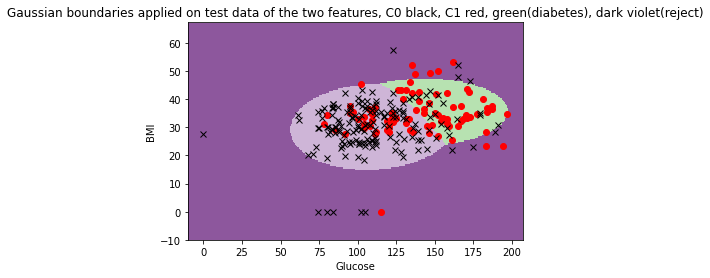

In [ ]:
plot_test_gaussian_reject(1, 5)

Discuss:

The Model of problem 5 with rejection has 76.7% of accuracy which is greater than the model without rejection (75.2%) on test data, that happens because model rejects data far away from centroids. Moreover, the difference is only 1.5% and the rejected cases are 8.1%, so the accuracy increase is not significant considering the cases that are rejected.